In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


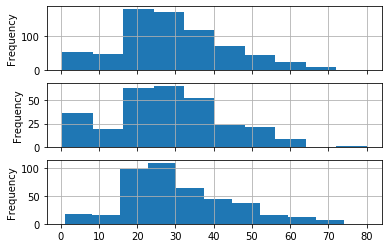

In [5]:
fig, axes = plt.subplots(3,1, sharex=True)
train['Age'].plot.hist(ax=axes[0], grid=True)
train[train['Survived']==1]['Age'].plot.hist(ax=axes[1], grid=True)
train[train['Survived']==0]['Age'].plot.hist(ax=axes[2], grid=True)

Male:   577, Survived: 109, Percentage: 18.890814558058924%
Female: 314, Survived: 233, Percentage: 40.38128249566724%


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


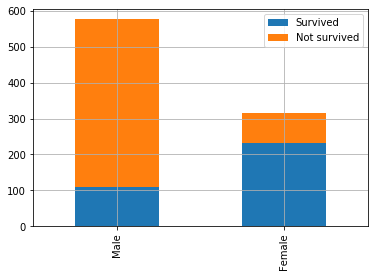

In [6]:
male = train[train['Sex']=='male'].shape[0]
female = train[train['Sex']=='female'].shape[0]
male_survived = train[train['Sex']=='male'][train['Survived']==1].shape[0]
female_survived = train[train['Sex']=='female'][train['Survived']==1].shape[0]
male_dead = male - male_survived
female_dead = female - female_survived

print("Male:   {}, Survived: {}, Percentage: {}%".format(male, male_survived, male_survived/male*100))
print("Female: {}, Survived: {}, Percentage: {}%".format(female, female_survived, female_survived/male*100))

fig, axes = plt.subplots(1,1)

data = {'Survived':[male_survived, female_survived], 'Not survived':[male_dead, female_dead]}
df = pd.DataFrame(data, index=['Male', 'Female'])

df.plot.bar(ax=axes, grid=True, stacked=True)

Class 1 passengers: 216, survived: 136, percentage: 62.96296296296296%
Class 2 passengers: 184, survived:  87, percentage: 47.28260869565217%
Class 3 passengers: 491, survived: 119, percentage: 24.236252545824847%


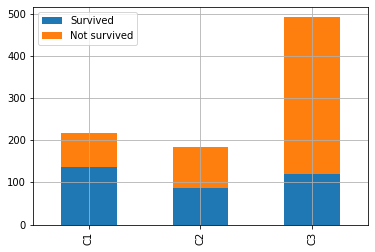

In [7]:
C1 = (train['Pclass']==1).sum()
C2 = (train['Pclass']==2).sum()
C3 = (train['Pclass']==3).sum()

C1_survived = (train[train['Pclass']==1]['Survived']==1).sum()
C2_survived = (train[train['Pclass']==2]['Survived']==1).sum()
C3_survived = (train[train['Pclass']==3]['Survived']==1).sum()

C1_dead = C1 - C1_survived
C2_dead = C2 - C2_survived
C3_dead = C3 - C3_survived

print("Class 1 passengers: {}, survived: {}, percentage: {}%".format(C1, C1_survived, C1_survived/C1*100))
print("Class 2 passengers: {}, survived:  {}, percentage: {}%".format(C2, C2_survived, C2_survived/C2*100))
print("Class 3 passengers: {}, survived: {}, percentage: {}%".format(C3, C3_survived, C3_survived/C3*100))

fig, axes = plt.subplots(1,1)

data = {'Survived':[C1_survived, C2_survived, C3_survived], 'Not survived':[C1_dead, C2_dead, C3_dead]}
df = pd.DataFrame(data, index=['C1', 'C2', 'C3'])

df.plot.bar(ax=axes, grid=True, stacked=True)

The average sibsp for survived passenger: 0.47368421052631576
The average sibsp for not survived passenger: 0.5537340619307832


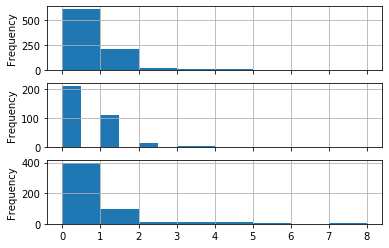

In [8]:
fig, axes = plt.subplots(3,1, sharex=True)

train['SibSp'].plot.hist(ax=axes[0], grid=True, bins=8)
train[train['Survived']==1]['SibSp'].plot.hist(ax=axes[1], grid=True, bins=8)
train[train['Survived']==0]['SibSp'].plot.hist(ax=axes[2], grid=True, bins=8)

print("The average sibsp for survived passenger: {}".format(train[train['Survived']==1]['SibSp'].mean()))
print("The average sibsp for not survived passenger: {}".format(train[train['Survived']==0]['SibSp'].mean()))

The average parch for survived passenger: 0.4649122807017544
The average parch for not survived passenger: 0.3296903460837887


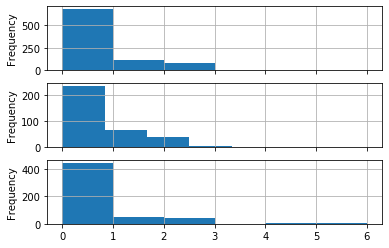

In [9]:
fig, axes = plt.subplots(3,1, sharex=True)

train['Parch'].plot.hist(ax=axes[0], grid=True, bins=6)
train[train['Survived']==1]['Parch'].plot.hist(ax=axes[1], grid=True, bins=6)
train[train['Survived']==0]['Parch'].plot.hist(ax=axes[2], grid=True, bins=6)

print("The average parch for survived passenger: {}".format(train[train['Survived']==1]['Parch'].mean()))
print("The average parch for not survived passenger: {}".format(train[train['Survived']==0]['Parch'].mean()))

The average fare for survived passenger:     48.39540760233918
The average fare for not survived passenger: 22.117886885245902


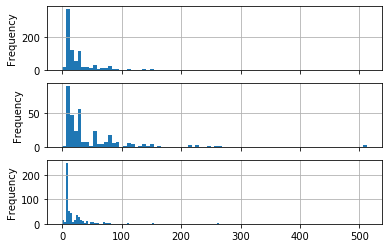

In [10]:
fig, axes = plt.subplots(3,1, sharex=True)

train['Fare'].plot.hist(ax=axes[0], grid=True, bins=80)
train[train['Survived']==1]['Fare'].plot.hist(ax=axes[1], grid=True, bins=80)
train[train['Survived']==0]['Fare'].plot.hist(ax=axes[2], grid=True, bins=80)

print("The average fare for survived passenger:     {}".format(train[train['Survived']==1]['Fare'].mean()))
print("The average fare for not survived passenger: {}".format(train[train['Survived']==0]['Fare'].mean()))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class PickFeature(BaseEstimator, TransformerMixin):
    def __init__(self, feature = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']):
        self.feature = feature
    
    def fit(self, dataframe):
        return self
    
    def transform(self, dataframe):
        return dataframe[feature].copy()

class OneHotCoder(BaseEstimator, TransformerMixin):     #for Sex (male/female) and Pclass (1/2/3)
    def __init__(self):
        return None
    
    def fit(self, dataframe):
        return self
    def transform(self, dataframe):
        if 'Sex' in dataframe.columns:
            sex_male = dataframe['Sex']=='male'
        if 'Pclass' in dataframe.columns:
            Pclass_1 = dataframe['Pclass']==1
            Pclass_2 = dataframe['Pclass']==2
            Pclass_3 = dataframe['Pclass']==3
        
        dataframe['Sex_male'] = sex_male
        dataframe['Pclass_1'] = Pclass_1
        dataframe['Pclass_2'] = Pclass_2
        dataframe['Pclass_3'] = Pclass_3
        
        dataframe = dataframe.drop('Sex', axis=1)
        dataframe = dataframe.drop('Pclass', axis=1)
        
        return dataframe

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

In [14]:
feature = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

pipeline = Pipeline([
    ('pick_feature', PickFeature(feature)),
    ('one_hot', OneHotCoder()),
    ('imputer', Imputer(strategy='median'))
])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
X_train = pipeline.fit_transform(train)
y_train = train['Survived'].values
X_test = pipeline.fit_transform(test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
X_train

(891, 8)
(891,)
(418, 8)


array([[22.,  1.,  0., ...,  0.,  0.,  1.],
       [38.,  1.,  0., ...,  1.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [28.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  0.,  0.,  1.]])

In [20]:
rnd_clf = RandomForestClassifier()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
params_grid = {'n_estimators':[100], 'max_depth':[2]}
grid_search = GridSearchCV(rnd_clf, params_grid, cv=3)

In [50]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(np.mean(cross_val_score(grid_search, X_train, y_train, cv=3)))
print(grid_search.score(X_train, y_train))

{'max_depth': 2, 'n_estimators': 100}
0.7957351290684623
0.8035914702581369


In [51]:
y_pred = grid_search.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
data = {"PassengerId":np.arange(892,1310), "Survived":y_pred}

y_pred_df = pd.DataFrame(data)

In [53]:
y_pred_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [54]:
y_pred_df.to_csv('titanic/out.csv', index=False)